# For-loops with theano or confrontational therapy for `theano.scan`-phobia

In this notebook, we will gently approach the function `theano.scan` from known concepts in python. `theano.scan` is a very general metafunction that permits the evaluation of loops fully within a computational graph. This implies that gradients can be automatically calculated from the resulting expressions. 

At the end of this tutorial, you should be able to understand and manipulate code like this (taken from the RNN tutorial)

```python
def step(x_t, h_tm1):
    h_t = T.nnet.sigmoid(T.dot(x_t, self.W_in) + 
                            T.dot(h_tm1, self.W_rec))
    y_t = T.nnet.softmax(T.dot(h_t, self.W_out))
    return [h_t, y_t]
            
[h_vals, y_vals], _ = theano.scan(fn=step,        
                                  sequences=X.dimshuffle(1,0,2),
                                  outputs_info=[h0, None])
```


`theano.scan` has many arguments and is quite formidable at first sight. We will introduce them one by one via two specific derivations of `theano.scan` which have pure-python counterparts: `map` and `reduce`.

We start with a quick refresher of functional programming concepts in pure python. Then we explore the theano equivalents. After this we will be equipped to tackle `theano.scan` in its full generality and at the end we'll code a small dynamical system.

In [1]:
%matplotlib inline
import theano
import theano.tensor as T
import numpy as np
import matplotlib.pyplot as plt

theano.config.floatX = 'float32'
theano.config.optimizer='fast_compile'

### Micro-reminder of functional programming keywords
We begin by recalling what `map` does: It applies a given function to all elements of an iterable sequence. We can use it, for example, to lift a sequence of integers to their squares.

In [2]:
def square(x):
    return x ** 2
map(square, np.arange(10))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

Relatedly, the function `reduce` accumulates (or 'folds') a sequence by iterative application of a binary function. The endpoint operation is done with a neutral element or the endpoint of the list. For instance, we can add up a sequence of numbers

In [3]:
def add(a, b):
    return a + b
reduce(add, np.arange(10), 0)

45

We can also apply it after modifying the sequence with a call to `map`, giving rise to an instance of the widely employed 'map-reduce' framework:

In [4]:
reduce(add, map(square, np.arange(10)), 0)

285

Make a verbose form of `add` called `verbose_add`, which prints its arguments when it is called. Map a function that takes a sequence element and returns a singleton list (`lambda x: [x]`) to a sequence of integers and reduce it using `verbose_add`. Try specifying different neutral elements or leaving them out.

In [ ]:
def verbose_add():
    pass

#reduce(lambda ...)

In [6]:
# %load scan_tutorial_solutions/sol_reduce_verbose_add.py



a=[100], b=[0]
a=[100, 0], b=[1]
a=[100, 0, 1], b=[2]
a=[100, 0, 1, 2], b=[3]
a=[100, 0, 1, 2, 3], b=[4]
a=[100, 0, 1, 2, 3, 4], b=[5]
a=[100, 0, 1, 2, 3, 4, 5], b=[6]
a=[100, 0, 1, 2, 3, 4, 5, 6], b=[7]
a=[100, 0, 1, 2, 3, 4, 5, 6, 7], b=[8]
a=[100, 0, 1, 2, 3, 4, 5, 6, 7, 8], b=[9]


[100, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Observe that the neutral element is fed at the beginning and that the accumulated values are fed into the left-hand argument. (**This will be the other way round in Theano.**) 


Note that `map` can actually take multiple sequences as input

In [6]:
map(verbose_add, np.arange(10), np.arange(100, 110))

a=0, b=100
a=1, b=101
a=2, b=102
a=3, b=103
a=4, b=104
a=5, b=105
a=6, b=106
a=7, b=107
a=8, b=108
a=9, b=109


[100, 102, 104, 106, 108, 110, 112, 114, 116, 118]

### Some functions with sequence output
We will now work with functions that could be called 'reduce with history', but that is a cumbersome name.

In the following you will be writing a lot of functions that are similar to each other, but with increasing complexity. Feel free to copy and paste from your previous work when appropriate.

Next up is a function that cumulatively adds all integers up to a certain point, starting from 0

In [7]:
def add_ints(n):
    output = [0]
    for i in range(1, n):
        output.append(output[-1] + i)
    return output

add_ints(10)

[0, 1, 3, 6, 10, 15, 21, 28, 36, 45]

Write a function that adds up the first n squares cumulatively and returns all of them.

In [ ]:
def accumulate_squares():
    pass

In [101]:
# %load scan_tutorial_solutions/sol_pure_python_accumulate_squares.py



In [12]:
accumulate_squares(10)

[0, 1, 5, 14, 30, 55, 91, 140, 204, 285]

Write a function that generates n elements of the Fibonacci sequence, using the recurrent formula $x_{n+2} = x_{n + 1} + x_n$,with $x_1 = 1$ and $x_0 = 0$.

In [ ]:
def fibonacci(n):
    pass

In [17]:
# %load scan_tutorial_solutions/sol_pure_python_fibonacci.py



In [16]:
fibonacci(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

Now write a version of `accumulate_squares` that takes an arbitrary sequence as input

In [ ]:
def accumulate_squares():
    pass

In [23]:
# %load scan_tutorial_solutions/sol_pure_python_general_acc_squares.py


In [22]:


accumulate_squares(np.arange(0, 12, 2))

[0, 4, 20, 56, 120, 220]

Take the next generalization step by providing a function that cumulatively combines any given sequence, similar to `reduce` but keeping the history. Then rewrite `add_squares` and `add_ints` using it. Make sure the left-hand argument of the binary function receives the current sequence value and the right hand argument receives the accumulated value. Also provide an argument `starting_point` from which to initiate the recursion but which will not appear in the output.

In [ ]:
def accumulate():
    pass

In [28]:
# %load scan_tutorial_solutions/sol_pure_python_general_accumulate.py


In [27]:
accumulate(verbose_add, np.arange(0, 10, 2), 4)    

a=0, b=4
a=2, b=4
a=4, b=6
a=6, b=10
a=8, b=16


[4, 6, 10, 16, 24]

In [12]:
accumulate(lambda a, b: a ** 2 + b, np.arange(10), 0.)

[0.0, 1.0, 5.0, 14.0, 30.0, 55.0, 91.0, 140.0, 204.0, 285.0]

## The theano versions of `map` and `reduce`
The theano versions of `map` and `reduce` work very similarly to their python counterparts, except that all entries can be symbolic. Let us first take a look at the docstrings and then try out some examples

### `theano.map`

In [13]:
theano.map?

Note that the function `map` returns `expression, updates`, of which we right now only need `expression`. The following code creates a theano function that squares the first `n` integers.

In [60]:
n = T.iscalar()
map_square_expr, updates = theano.map(square, sequences=T.arange(n))

f_map_square = theano.function([n], map_square_expr)

f_map_square(11)

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100], dtype=int32)

Write a function that maps the function `square` to any input array.

In [ ]:
# ...
# f_square_arr = theano.function(...)

In [32]:
# %load scan_tutorial_solutions/sol_theano_map_square.py


In [31]:
f_square_arr(2. * np.arange(10).astype(np.float32))

array([   0.,    4.,   16.,   36.,   64.,  100.,  144.,  196.,  256.,  324.], dtype=float32)

Now, using `theano.map`, write a function that takes two arrays and adds them elementwise. Use the function `add`. Make sure that the function returns what you expect.

In [ ]:
# ...
# f_add = theano.function(...)

In [36]:
# %load scan_tutorial_solutions/sol_theano_map_add_two_seq.py


In [35]:


f_add(np.arange(10).astype('float32'), np.arange(100, 110).astype('float32'))

array([ 100.,  102.,  104.,  106.,  108.,  110.,  112.,  114.,  116.,  118.], dtype=float32)

Take another look at the docstring of `theano.map` and identify the argument `non_sequences`. This is a list of auxiliary expressions that can be passed to the scan function. While `theano.maps/reduce/scan` sees all expressions outside its arguments, it is preferable to pass any addition expression that will be used via `non_sequences`. We can show this using the example of a polynomial of fixed coefficients whose list of monomials we will generate. 

A polynomial in $x$ can be written as $p(x) = c_0 x^0 + c_1 x^1 + c_2 x^2 + ... + c_N x^N$. We will keep the coefficients $c_i$ in an array `coefs` and define the symbolic variable `x`. We choose the coefficients to be $c_i = \left(\begin{array}{c}4\\i\end{array}\right)$, such that $p(x) = (x + 1)^4$

In [42]:
coefs = T.constant(np.array([1, 4, 6, 4, 1]).astype('float32'))
x = T.fscalar()

Using `theano.map` and an appropriate function, create an expression that outputs a list of monomials in the symbolic variable `x` with coefficients from `coefs`.

In [39]:
def generate_monomial():
    pass

#...
# f_monomials = theano.function(...)

In [45]:
# %load scan_tutorial_solutions/sol_theano_map_univar_polynomial.py


In [44]:
f_monomials(2.).sum()

81.0

In [50]:
y = T.fscalar()

Now do the same for two variables `x, y` in order to calculate the list of monomials for `(x + y) ** 4`

In [53]:
def generate_double_monomial():
    pass

# f_binomial = theano.function(...)

In [54]:
# %load scan_tutorial_solutions/sol_theano_map_binomial.py


In [52]:

f_binomial(1., 2.).sum()

81.0

We can also take derivatives through these polynomial expressions. Let's try this for the univariate polynomial first. We have $p'(x) = 4(x + 1)^3$ and so expect, e.g. $p'(1) = 4\times 2^3 = 32$

In [55]:
univar_polynomial_gradient = T.grad(monomial_expr.sum(), wrt=x)

f_univar_pol_grad = theano.function([x], univar_polynomial_gradient)

f_univar_pol_grad(1.)

array(32.0)

Now do the same for the multivariate polynomial. We expect 
$p(x, y) = \left(\begin{array}{c}4(x + y)^3\\4(x + y)^3\end{array}\right)$


In [58]:
multivar_polynomial_gradient = T.grad(double_monomial_expr.sum(), wrt=[x, y])

f_univar_pol_grad = theano.function([x, y], multivar_polynomial_gradient)

f_univar_pol_grad(0.5, 0.5)

[array(4.0), array(4.0)]

### `theano.reduce`

Now let's take a look at the docstring of `theano.reduce`.

In [23]:
theano.reduce?

As you can see, it takes 3 compulsory arguments - the function `fn`, a list of `sequences` and `outputs_info`. It will become extremely important to understand the role of the latter. It has several functions, the first of which we shall concentrate on now: Providing initial values (or the 'neutral element' for the reduce operation).

We begin by using `theano.reduce` to sum a sequence of integers.

In [61]:
int_sum_expr, updates = theano.reduce(add, sequences=T.arange(n), outputs_info=np.int32(0))

f_int_sum = theano.function([n], int_sum_expr)
f_int_sum(10)

array(45, dtype=int32)

Note that it is highly important to get the data types right - this implies being aware of potential implicit type casts within functions.

Now write a function that adds all squares of the first `n` integers.

In [65]:
def add_square_a_to_b():
    pass

# f_square_sum = theano.function ...

In [104]:
# %load scan_tutorial_solutions/sol_theano_reduce_sum_square_ints.py


In [64]:


f_square_sum(10)

array(285, dtype=int32)

Now we would like to reduce a function with multiple outputs. Find out how to employ reduce to return the sum of the first `n` integers *as well as* the first `n` squares

In [45]:
def add_squares_and_ints(i, cur_int_sum, cur_square_sum):   # to be removed
    return i + cur_int_sum, i ** 2 + cur_square_sum

both_expressions, updates = theano.reduce(add_squares_and_ints,
                                          sequences=T.arange(n),
                                          outputs_info=[np.cast['int32'](0)] * 2)
f_both = theano.function([n], both_expressions)

f_both(10)

[array(45, dtype=int32), array(285, dtype=int32)]

Now look at the following function

In [68]:
def return_args_and_accumulate_squares_and_ints(i, cur_int_sum, cur_square_sum):
    return i, cur_int_sum, cur_square_sum, i + cur_int_sum, i ** 2 + cur_square_sum

Use this function in `theano.reduce` to obtain exactly the same result as before. Note that the first three outputs of the function should be considered as useless and should be ignored. To do this, you need to modify `outputs_info` and place `None` at every place where you are not interested in feeding the output of the function back.

We have just discovered the second meaning/use of `outputs_info`: Aside from containing initial values, it also regulates which values of the function are fed back. Thinking about this a little, the two concepts go hand in hand: Function outputs that are fed back into function require arguments to take those values. These arguments need to be fed with initial values at the beginning of the loop.

Note that the final output will also contain the final outputs of the function that were not fed back.

In [ ]:
# ...

#f_both = theano.function ...

In [73]:
# %load scan_tutorial_solutions/sol_theano_reduce_multi_output.py



In [72]:

f_both(10)

[array(9, dtype=int32),
 array(36, dtype=int32),
 array(204, dtype=int32),
 array(45, dtype=int32),
 array(285, dtype=int32)]

Let's generalize this power thing a little awkwardly. Here is a list of powers

In [76]:
powers = [0, 1, 2, 3]

Use these powers as `non_sequences` and write a reduce function that gives back the accumulated sums of all these powers. Hint: use `*args` (never do that in practice) and figure out where which input arguments are placed.

In [79]:
# def accumulate_all_powers(...)

#f_all_powers = ...

In [80]:
# %load scan_tutorial_solutions/sol_theano_reduce_awkward_multiple_powers.py



In [78]:

f_all_powers(10)


[array(10, dtype=int32),
 array(45, dtype=int32),
 array(285, dtype=int32),
 array(2025, dtype=int32)]

Figure out a way to do this less awkwardly by vectorizing the power operation. Now the powers can even be symbolic:

In [81]:
powvec = T.ivector()

Write a function that gives the same output that is much less awkward

In [83]:
# def accumulate_powers(...)

# f_acc_powers = theano.function(...)

In [84]:
# %load scan_tutorial_solutions/sol_theano_reduce_vectorized_multiple_powers.py


In [85]:
f_acc_powers(10, np.array([0, 1, 2, 3, 5]).astype('int32'))

array([    10,     45,    285,   2025, 120825], dtype=int32)

Now recall the function that outputs a list of monomials from above. Reduce it to return a polynomial.

In [89]:
# ...

# f_poly = theano.function ...

In [90]:
# %load scan_tutorial_solutions/sol_theano_reduce_monomials_from_map.py



In [88]:

f_poly(3.)

array(256.0)

The same effect can be obtained by solely using reduce. Using a function which feeds back and accumulates `x` raised to a power as well as the polynomial expression, this can be done.

In [92]:
# def accumulate_polynomial(...):

# f_r_poly = theano.function(...)

In [96]:
# %load scan_tutorial_solutions/sol_theano_reduce_monomials.py


In [95]:

f_r_poly(2.)

array(81.0, dtype=float32)

What about that Fibonacci sequence from the beginning? Can we calculate it using `theano.reduce`? Well, yes, we can, but it's **CHEATING**. Apart from simply exploiting the closed form formula, we can emulate looking back two steps into history. This is, however, a house-keeping trick and not necessarily the way we want to solve this problem in the end.

In [97]:
def fib_acc(i, old_value, older_value):
    return old_value + older_value, old_value

(fib_expr, _), updates = theano.reduce(fib_acc,
                                        sequences=T.arange(n),
                                        outputs_info=[np.int32(1), np.int32(0)])

f_fib = theano.function([n], fib_expr)
f_fib(6)

array(13, dtype=int32)

Can we output an accumulative sequence, as does our function `accumulate` from above? Well, 'unfortunately', yes, we can, but it's **CHEATING**, too! Take as an example accumulating the squares of a sequence:

In [53]:
seq = T.fvector()

def acc_squares(u, i, acc_array):
    return T.inc_subtensor(acc_array[i:], u)

acc_expr, updates = theano.reduce(acc_squares,
                                  sequences=[seq, T.arange(seq.shape[0])],
                                  outputs_info=T.zeros_like(seq))

f_acc_expr = theano.function([seq], acc_expr)

f_acc_expr(np.arange(10.).astype('float32'))

array([  0.,   1.,   3.,   6.,  10.,  15.,  21.,  28.,  36.,  45.], dtype=float32)

You may ask: Why exactly is this cheating? The correct answer is that `theano.reduce` was not made for these settings and will be inefficient if misused. Especially the last example shows this: There is no need to increment a large part of a tensor at each iteration in order to achieve what is asked.

Hence why we shall now move on to the most general of theano looping functions: `theano.scan`

## Generalizing to generalized generality: The generalization of `theano.scan` is `theano.scan`

With `theano.scan` you can do everything. Contrary to `reduce` it natively outputs all sequence values. It can also provide access to points not in the immediate history of the sequences, permitting arbitrary taps as long as the initialization is long enough, too. The general setup with respect to `sequences`, `outputs_info`, `non_sequences` is exactly the same as in `theano.reduce`.

Let's start by once again adding up integers:

In [54]:
scan_ints_expr, updates = theano.scan(add,
                                      sequences=T.arange(n),
                                      outputs_info=np.int32(0))
f_scan_integers = theano.function([n], scan_ints_expr)

f_scan_integers(10)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32)

Once again, please do the same for adding squares (e.g. using `add_square_a_to_b` from above)

In [ ]:
# ...

# f_scan_squares = theano.function(...)

In [107]:
# %load scan_tutorial_solutions/sol_theano_scan_accumulate_squares.py


In [106]:

f_scan_squares(10)

array([  0,   1,   5,  14,  30,  55,  91, 140, 204, 285], dtype=int32)

Similary to with `theano.reduce` before, create a scan that outputs both sums of integers and sums of squares at the same time. Further, have it output $\frac{n^2 + n}{2} + 1$ at every iteration (don't feed it back, place `None` in `outputs_info`), and check that this value is always 1 higher than the sum of integers. 

In [111]:
# def acc_ints_and_squares(...)

# f_scan_ints_and_squares = theano.function(...)

In [112]:
# %load scan_tutorial_solutions/sol_theano_scan_accumulate_ints_and_squares.py



In [110]:

f_scan_ints_and_squares(10)

[array([ 1,  2,  4,  7, 11, 16, 22, 29, 37, 46], dtype=int32),
 array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32),
 array([  0,   1,   5,  14,  30,  55,  91, 140, 204, 285], dtype=int32)]

Let us tackle the concept of `taps` by finally addressing the fibonacci sequence without resorting to tricks. In order to do so, take a look at the following `scan`.

In [122]:
def identity(x):
    return x

alternating_expr, updates = theano.scan(
        identity,
        sequences=None,
        outputs_info=[dict(initial=np.float32([9., 1.]), taps=[-2])],
        n_steps=10)

f_alternating_expr = theano.function([], alternating_expr)

f_alternating_expr()

array([ 9.,  1.,  9.,  1.,  9.,  1.,  9.,  1.,  9.,  1.], dtype=float32)

Take a close look at the above function. We have introduced a more general `outputs_info`: It takes initial values, but also `taps`, indicating where in history to look and which values to give to the scanning function `identity`. `identity` lives up to its name and just outputs its input. We observe an oscillation due to the lag.

One can give several taps to the function:

In [126]:
def minus(x, y):
    return x - y

another_alternating_expr, updates = theano.scan(
        minus,
        sequences=None,
        outputs_info=[dict(initial=np.float32([1., 1.]), taps=[-1, -2])],
        n_steps=10)

f_alternating2 = theano.function([], another_alternating_expr)
f_alternating2()

array([ 0., -1., -1.,  0.,  1.,  1.,  0., -1., -1.,  0.], dtype=float32)

Using two taps and appropriate initial values, write the fibonacci series up to `n`.

In [133]:
# def fib_acc(...)

# f_fib_scan = theano.function ...

In [132]:
# %load scan_tutorial_solutions/sol_theano_scan_fibonacci.py



In [130]:
f_fib_scan(10)

array([ 1,  2,  3,  5,  8, 13, 21, 34, 55, 89], dtype=int32)

Bonus: Write an awkward convolution function using this mechanism

### An oscillating dynamical system

We will use `theano.scan` to create a small sinusoidal oscillating dynamical system by iterative multiplication of a small rotation generator. Let us define an angle increment and its corresponding 2D rotation matrix:

In [146]:
theta = 2 * np.pi / 720
rotation = np.array([[np.cos(theta), -np.sin(theta)],
                    [np.sin(theta), np.cos(theta)]])
a = 1.000
rot = T.constant(a * rotation.astype('float32'))

Using an initial vector `[1., 0.]`, apply this rotation generator iteratively for `n` iterations, keeping all outputs.

In [151]:
# def rotation_increment(old_value):

# f_oscillation = theano.function(...)

In [152]:
# %load scan_tutorial_solutions/sol_theano_scan_oscillation.py


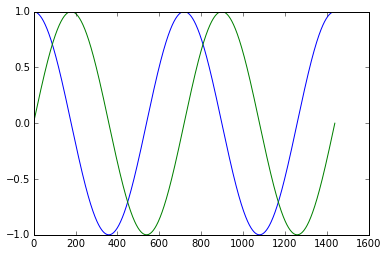

In [153]:
plt.plot(f_oscillation(1440))

Observe that we specified a parameter `a` above that we multiplied to the rotation matrix. Try setting it to `.999` and `1.001` respectively and observe the results.

We observe that oscillations increase to explosion or decrease quite rapidly to zero. Let us attempt to feed some input to modulate this behaviour.

Write a function that takes a sequence of modulation factors. Multiply their exponential to the rotation matrix.

In [ ]:
# a_vector = T.fvector()
# def controlled_rotation(

# f_controlled_oscillation

In [160]:
# %load scan_tutorial_solutions/sol_theano_scan_modulated_oscillation.py
a_vector = T.fvector()

def controlled_rotation(a, old):
    return T.exp(a) * rot.dot(old)

controlled_oscillation, updates = theano.scan(controlled_rotation,
                                             sequences=a_vector,
                                            outputs_info=np.float32([1., 0.]))

f_controlled_oscillation = theano.function([a_vector], controlled_oscillation)


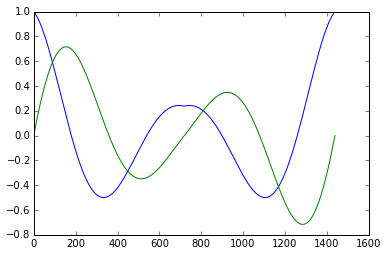

In [158]:
modulation = np.float32(np.concatenate([-np.ones(720), np.ones(720)]) / 500.)

plt.plot(f_controlled_oscillation(modulation))